## Развлекательное приложение Procrastinate Pro+.
####  Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.
## Цель проекта:
#### разобраться в причинах и помочь компании выйти в плюс.


### Описание данных:
1. visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии
2. orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.
3. costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

In [1]:
# Загружаем данные
import pandas as pd

try:    
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )
except: 
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

In [2]:
# Напишем функцию для удобного первичного анализа
def get_first_analys(data):
    print(data.head())
    print()
    print('Посмотрим общую информацию')
    print()
    print(data.info())
    print()
    print('Посмотрим есть ли пропуски')
    print()
    print(data.isna().sum())
    print()
    print('Количество явных дубликатов')
    print()
    print(data.duplicated().sum())

In [3]:
get_first_analys(visits)

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  

Посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Ses

In [4]:
get_first_analys(orders)

        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Посмотрим есть ли пропуски

User Id     0
Event Dt    0
Revenue     0
dtype: int64

Количество явных дубликатов

0


In [5]:
get_first_analys(costs)

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Посмотрим есть ли пропуски

dt         0
Channel    0
costs      0
dtype: int64

Количество явных дубликатов

0


In [6]:
# приведу к нижнему регистру название колонок всех фреймов
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [7]:
# преобразование данных о времени
visits['session start'] = pd.to_datetime(visits['session start'])
visits['session end'] = pd.to_datetime(visits['session end'])
orders['event dt'] = pd.to_datetime(orders['event dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

In [9]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

In [10]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

## Создадим функции:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [11]:
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [12]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Исследовательский анализ данных


In [20]:
# Составим профили пользователей
events = None

users = get_profiles(visits, orders, events, costs)

min_date = users['first_ts'].min()
max_date = users['first_ts'].max()
print(f'Минимальная дата привлечения пользователей : {min_date}')
print(f'Максимальная дата привлечения пользователей : {max_date}')

Минимальная дата привлечения пользователей : 2019-05-01 00:00:41
Максимальная дата привлечения пользователей : 2019-10-27 23:59:04


In [21]:
users

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [22]:
#  Пострим таблицу, отражающую количество пользователей и долю платящих из каждой страны. 
users.groupby('region').agg(
    {'user_id':'nunique','payer':'mean'}).sort_values(by='payer')

,user_id,payer
region,,
France,17450,0.037994
UK,17575,0.039829
Germany,14981,0.041119
United States,100002,0.069019


In [23]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройствa
users.groupby('device').agg(
    {'user_id':'nunique','payer':'mean'}).sort_values(by='payer')

,user_id,payer
device,,
PC,30455,0.050468
Android,35032,0.058518
iPhone,54479,0.062079
Mac,30042,0.063644


In [24]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
users.groupby('channel').agg(
    {'user_id':'nunique','payer':'mean'}).sort_values(by='payer')

,user_id,payer
channel,,
organic,56439,0.020553
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
MediaTornado,4364,0.035747
YRabbit,4312,0.038265
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
TipTop,19561,0.096007
lambdaMediaAds,2149,0.104700


### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [25]:
# Общая сумма рассходов на маркетинг 
users['acquisition_cost'].sum()

105497.29999999999

In [26]:
# Сумма расходов на рекламу по источникам.
channel_cost = users.groupby('channel').agg(
    {'acquisition_cost':'sum'})
channel_cost

,acquisition_cost
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


In [27]:
# Поменяем тип и создадим столбцы с неделей и месяцем.
users['dt'] = pd.to_datetime(users['dt']).dt.date
users['month'] = pd.to_datetime(users['dt']).dt.month
users['week'] = pd.to_datetime(users['dt']).dt.isocalendar().week

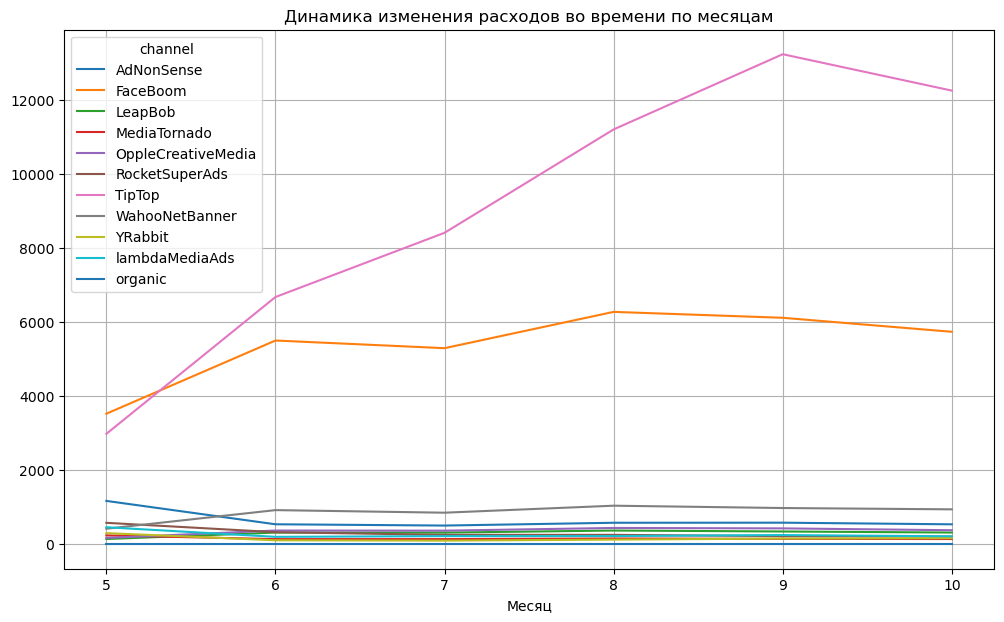

In [28]:
# Динамика изменения расходов во времени по месяцам
channel_month = users.pivot_table(index='channel', columns='month', values='acquisition_cost', aggfunc='sum')
channel_month.T.plot(grid=True, figsize=(12,7))
plt.title('Динамика изменения расходов во времени по месяцам')
plt.xlabel('Месяц')
plt.show()

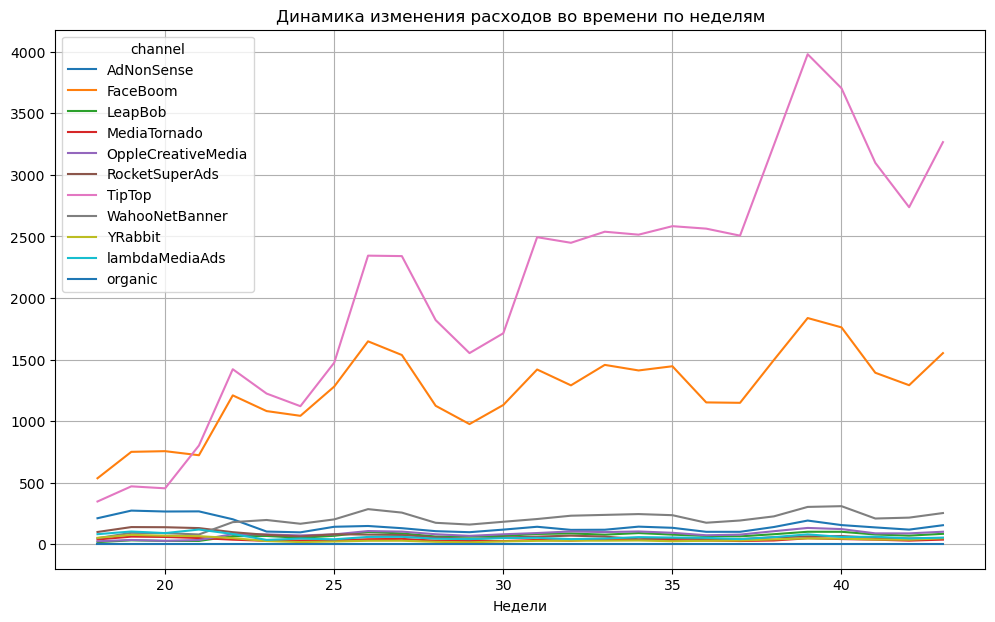

In [29]:
# Динамика изменения расходов во времени по неделям
channel_week = users.pivot_table(index='channel', columns='week', values='acquisition_cost', aggfunc='sum')
channel_week.T.plot(grid=True, figsize=(12,7))
plt.title('Динамика изменения расходов во времени по неделям')
plt.xlabel('Недели')
plt.show()

In [30]:
#Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
users.groupby('channel').agg({'acquisition_cost':'mean'})

,acquisition_cost
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

In [31]:
# Уберем органических пользователей,так как они нам достались безвозмездно.
users = users.query('channel != "organic"')

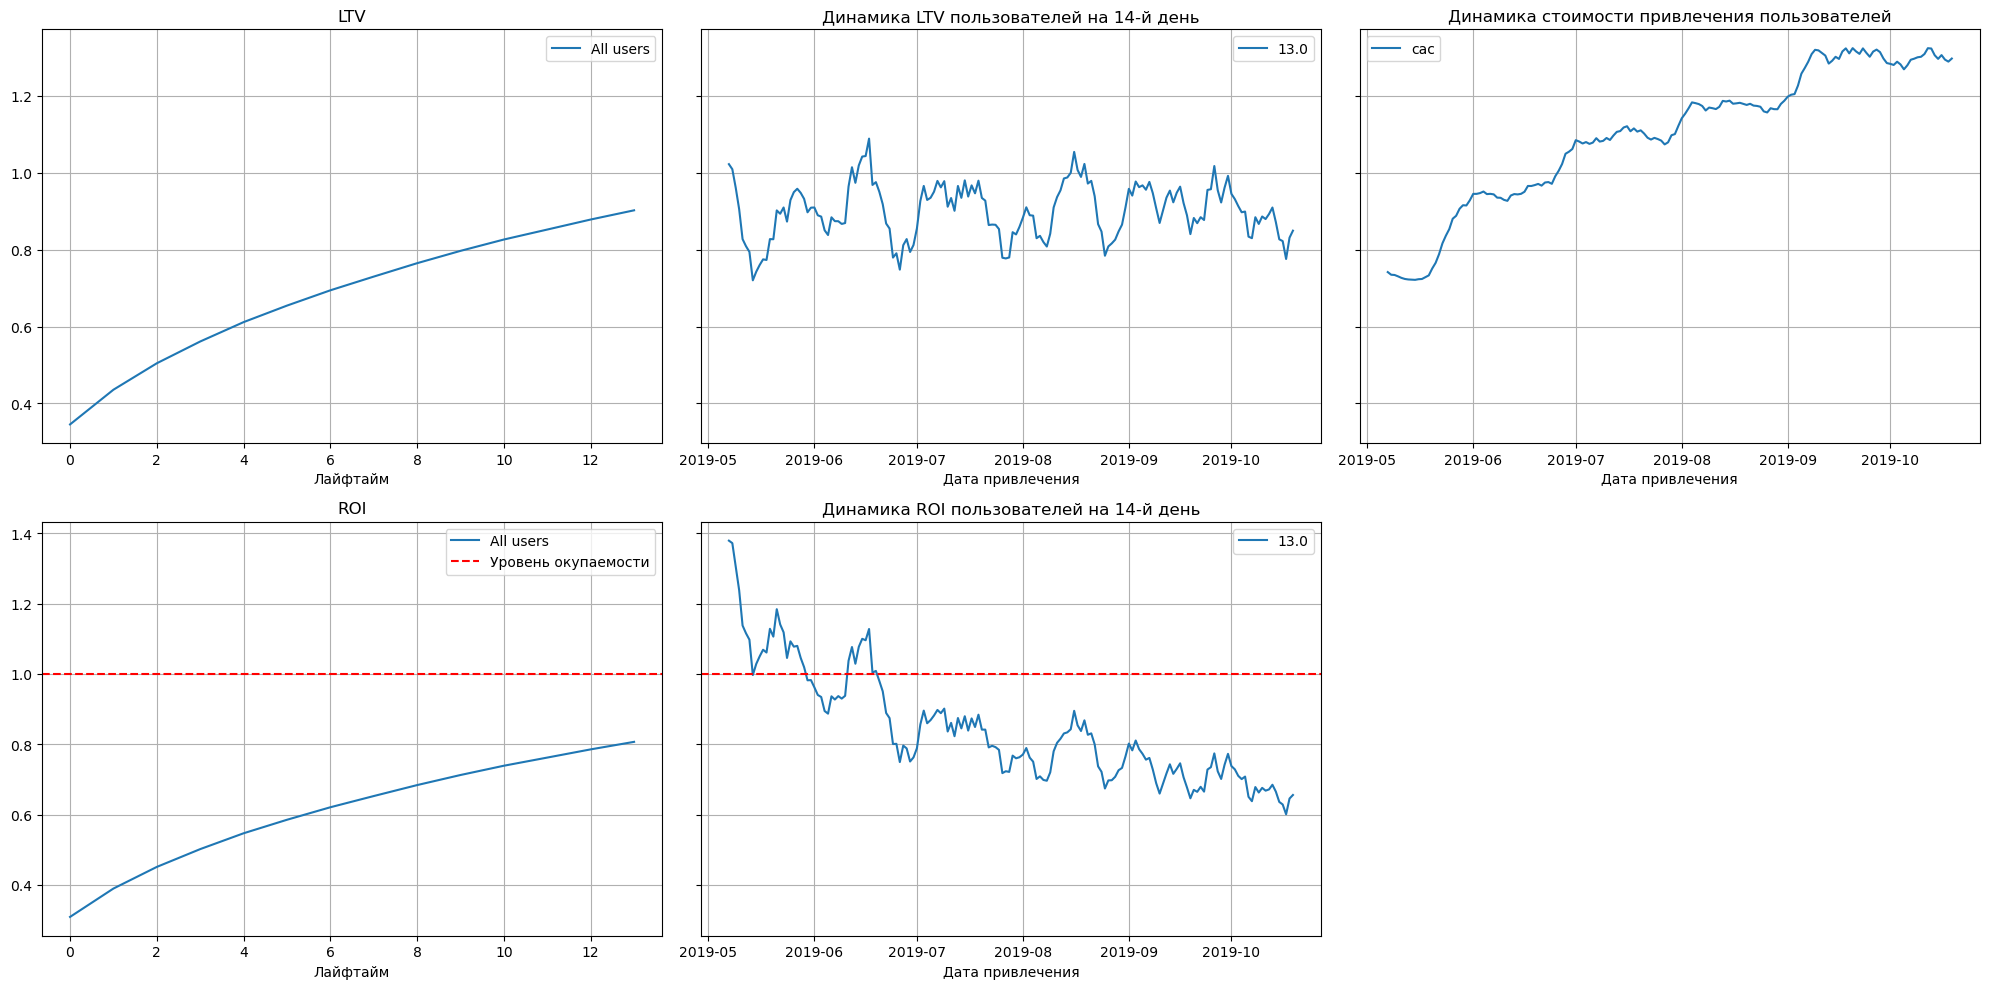

In [32]:
# Зададим момент анализа
observation_date = datetime(2019, 11, 1).date()
# Зададим горизонт анализа
horizon_days = 14
# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### По графикам можно сделать такие выводы:
- Реклама не окупается. ROI на  конец второй недели — чуть выше 80%.
- САС увелитивается. Возможно дело в увеличении рекламного бюджета.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

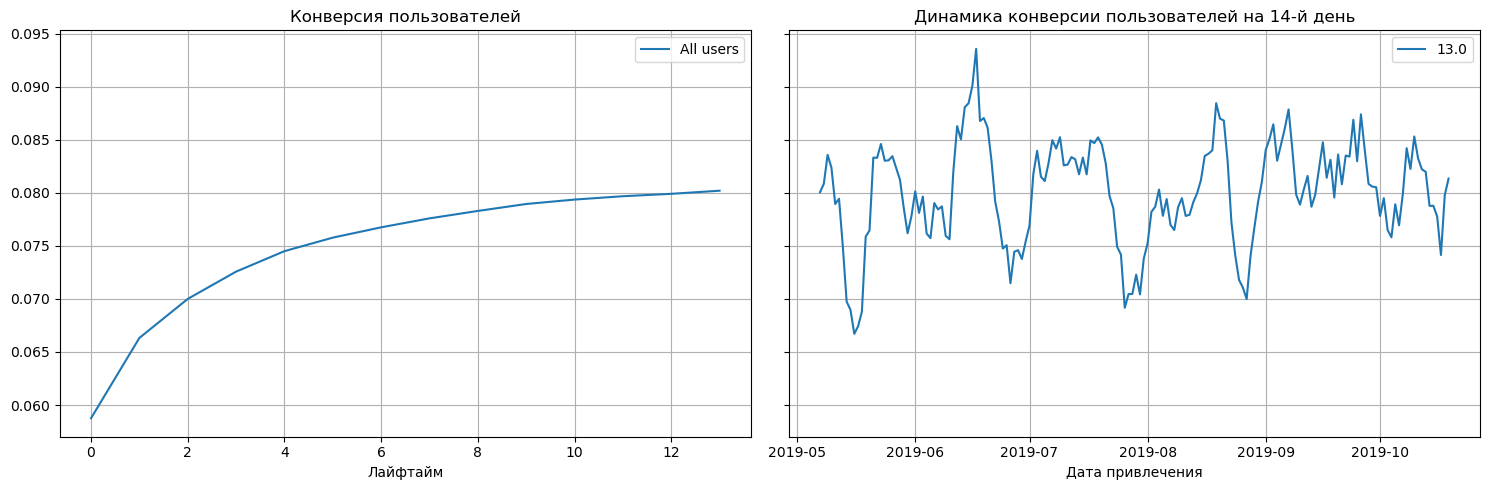

In [33]:
# Проверим конверсию пользователей и динамику её изменения.
# Построим и изучим графики конверсии
result_raw, result_grouped, result_in_time  = get_conversion(
    users,
    orders,
    observation_date,
    horizon_days
)

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

### Из графиков видно:
- Конверсия подвержена сезонности,но достаточно стабильна.

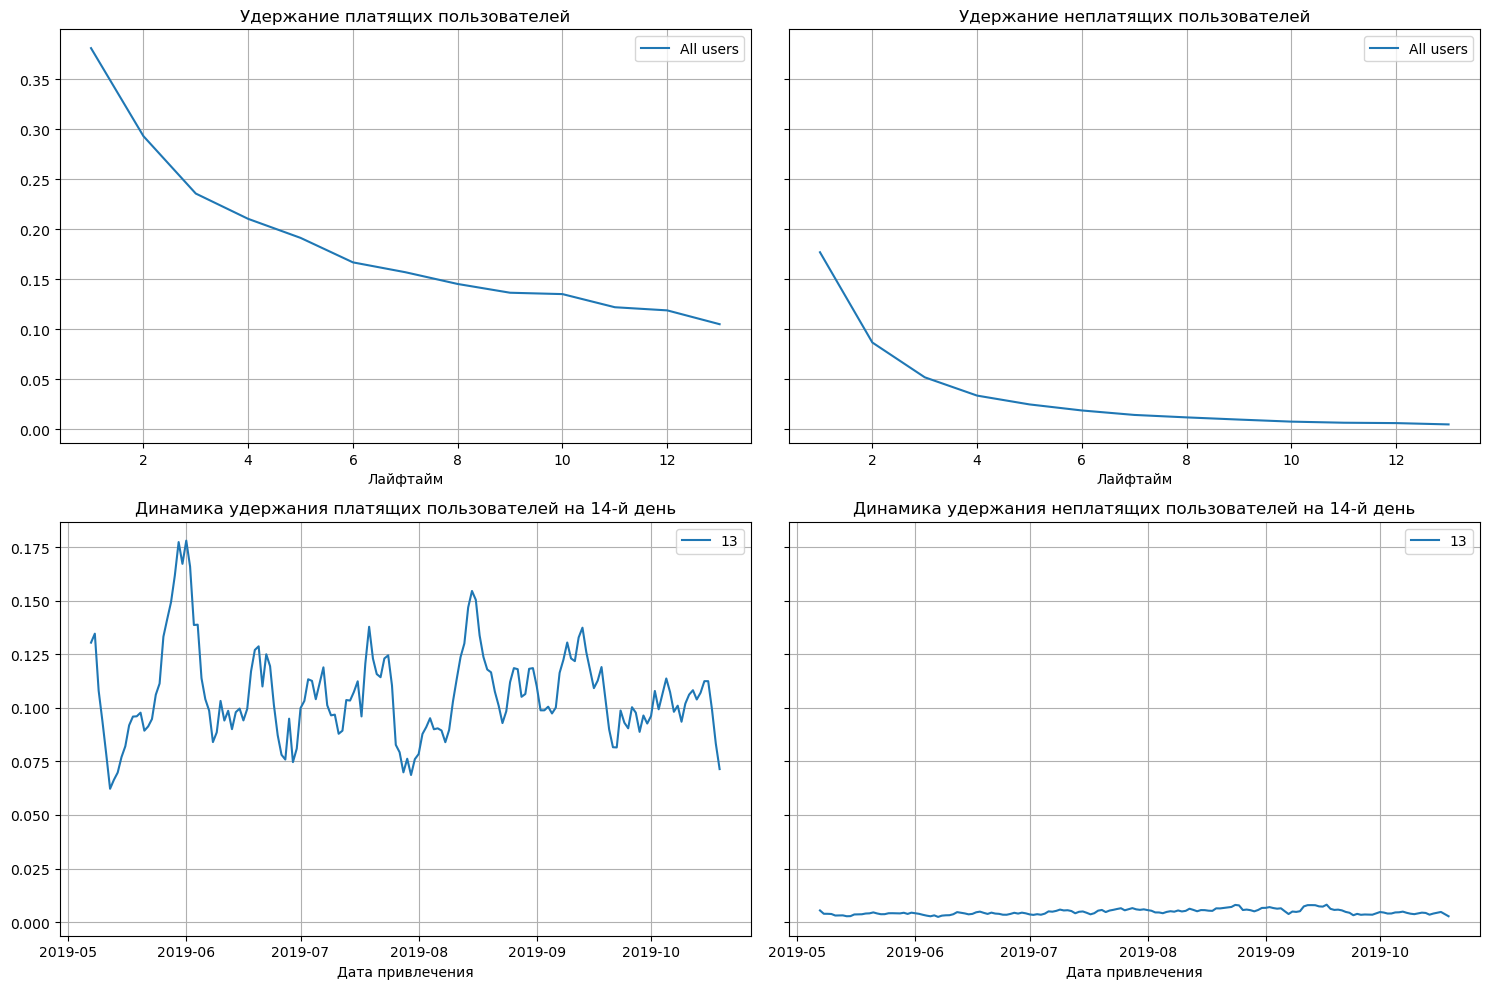

In [34]:
# Проверим удержание пользователей и динамику его изменения.
# Построим и изучим графики удержания.

result_raw, result_grouped, result_in_time = get_retention(
    users,
    visits,
    observation_date,
    horizon_days
)

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

### Из графиков видно:
- Как и ожидалось удержание у платящих выше чем у неплатящих.
- На динамике удержания видно, что у платящих есть сезонность, а у неплатящих все стабильно.

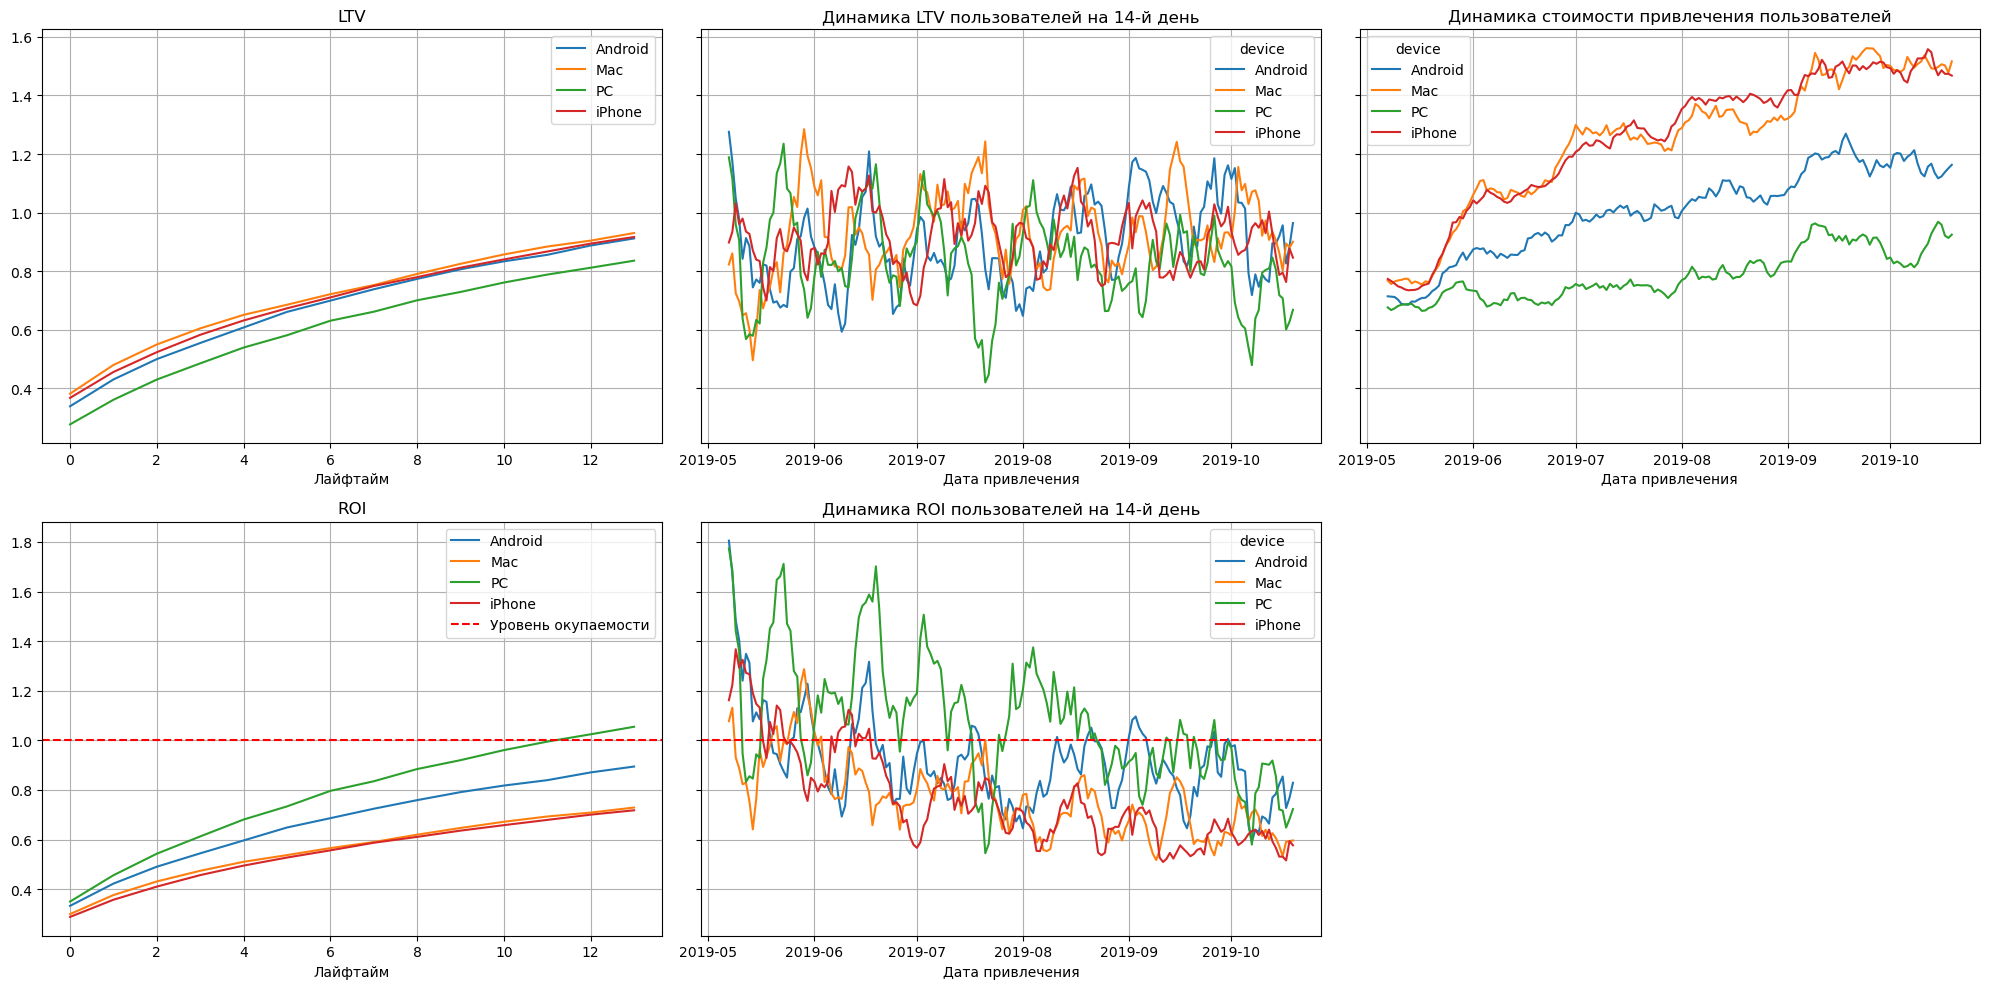

In [35]:
# Проанализируем окупаемость рекламы с разбивкой по устройствам.
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

### Из графиков видно:
- LTV всё так же подвержен сезонности, но стабилен.
- Стоимость привлечения PC ниже всех.
- Стоимость привлечения для Iphone и Mac самая высокая.
- Реклама не окупаеться везде кроме PC.

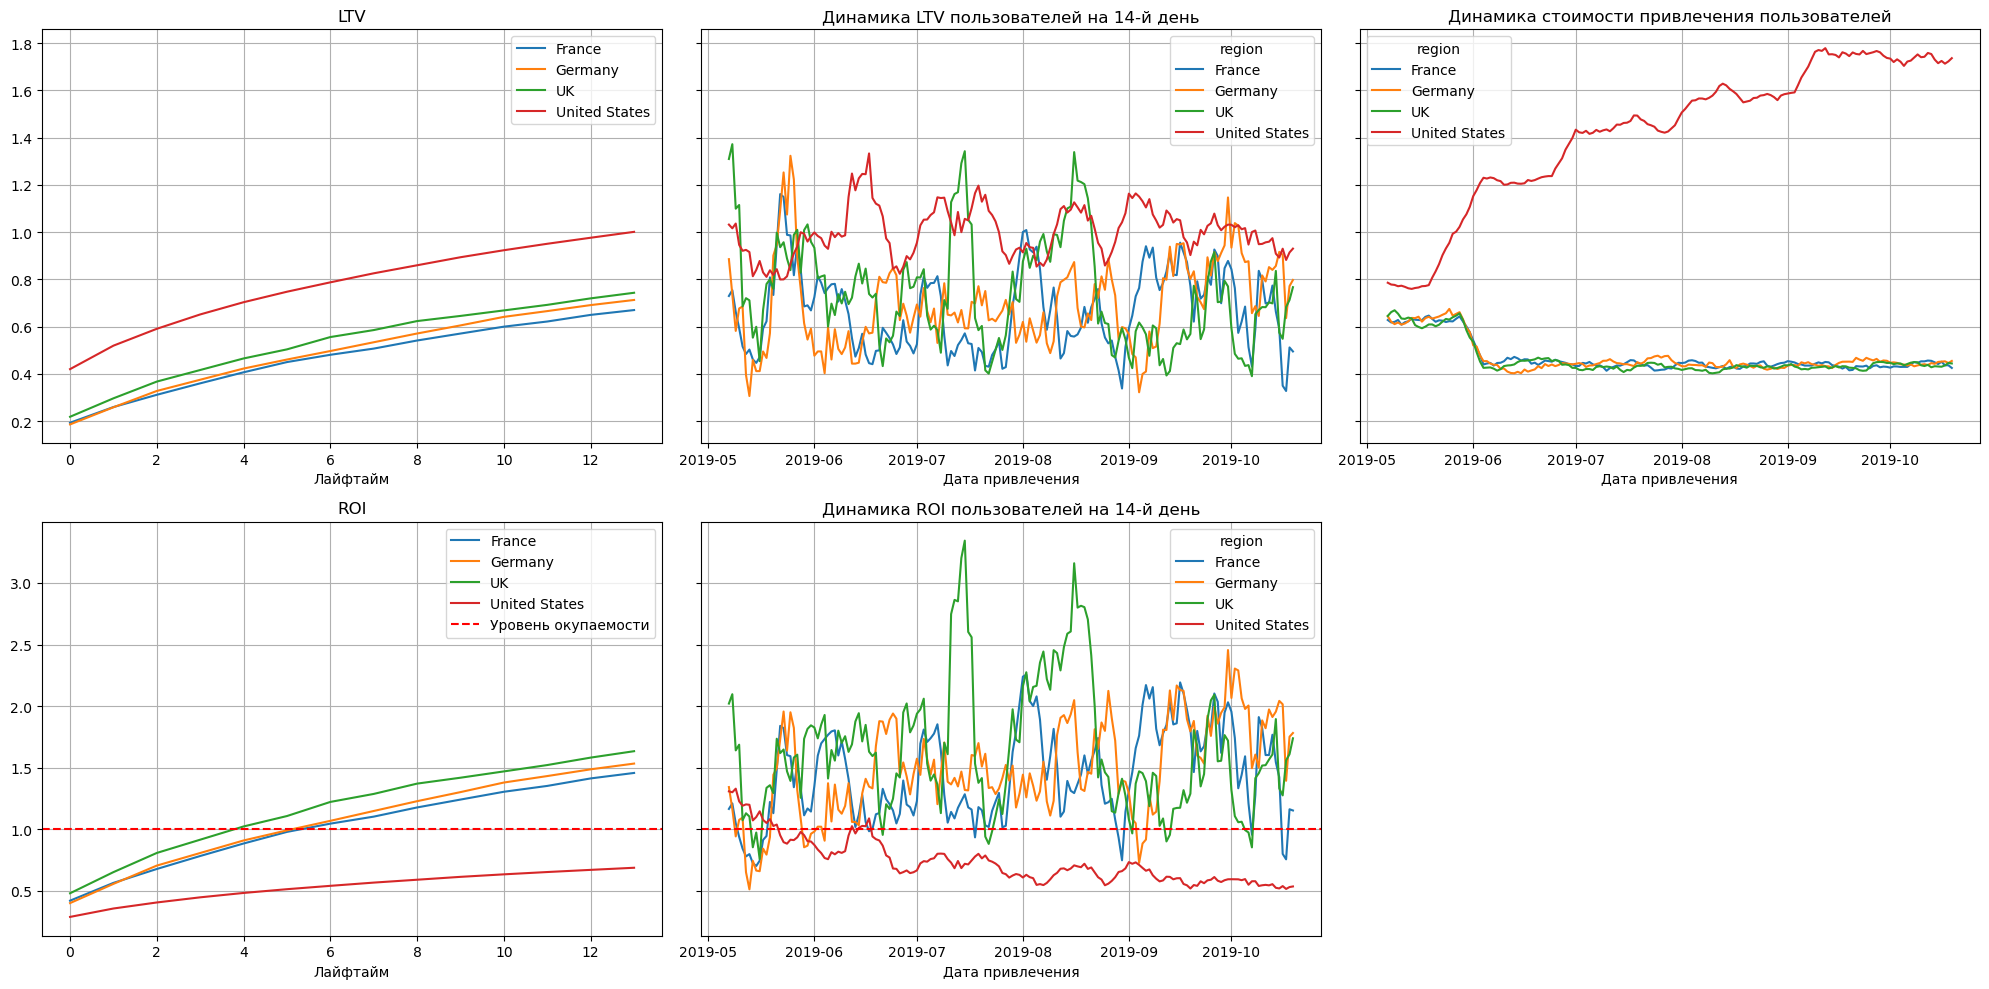

In [36]:
# Проанализируем окупаемость рекламы с разбивкой по странам.
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

### Из графиков видно:
- САС в США сильно превышает остальные, но сильно отстает по окупаемости от остальных.
- В динамики окупаемости видно как после с ростом стоимости рекламы упала окупаемость.
- Во всех остальных странах наоборот цена упала,а окупаемость выросла.

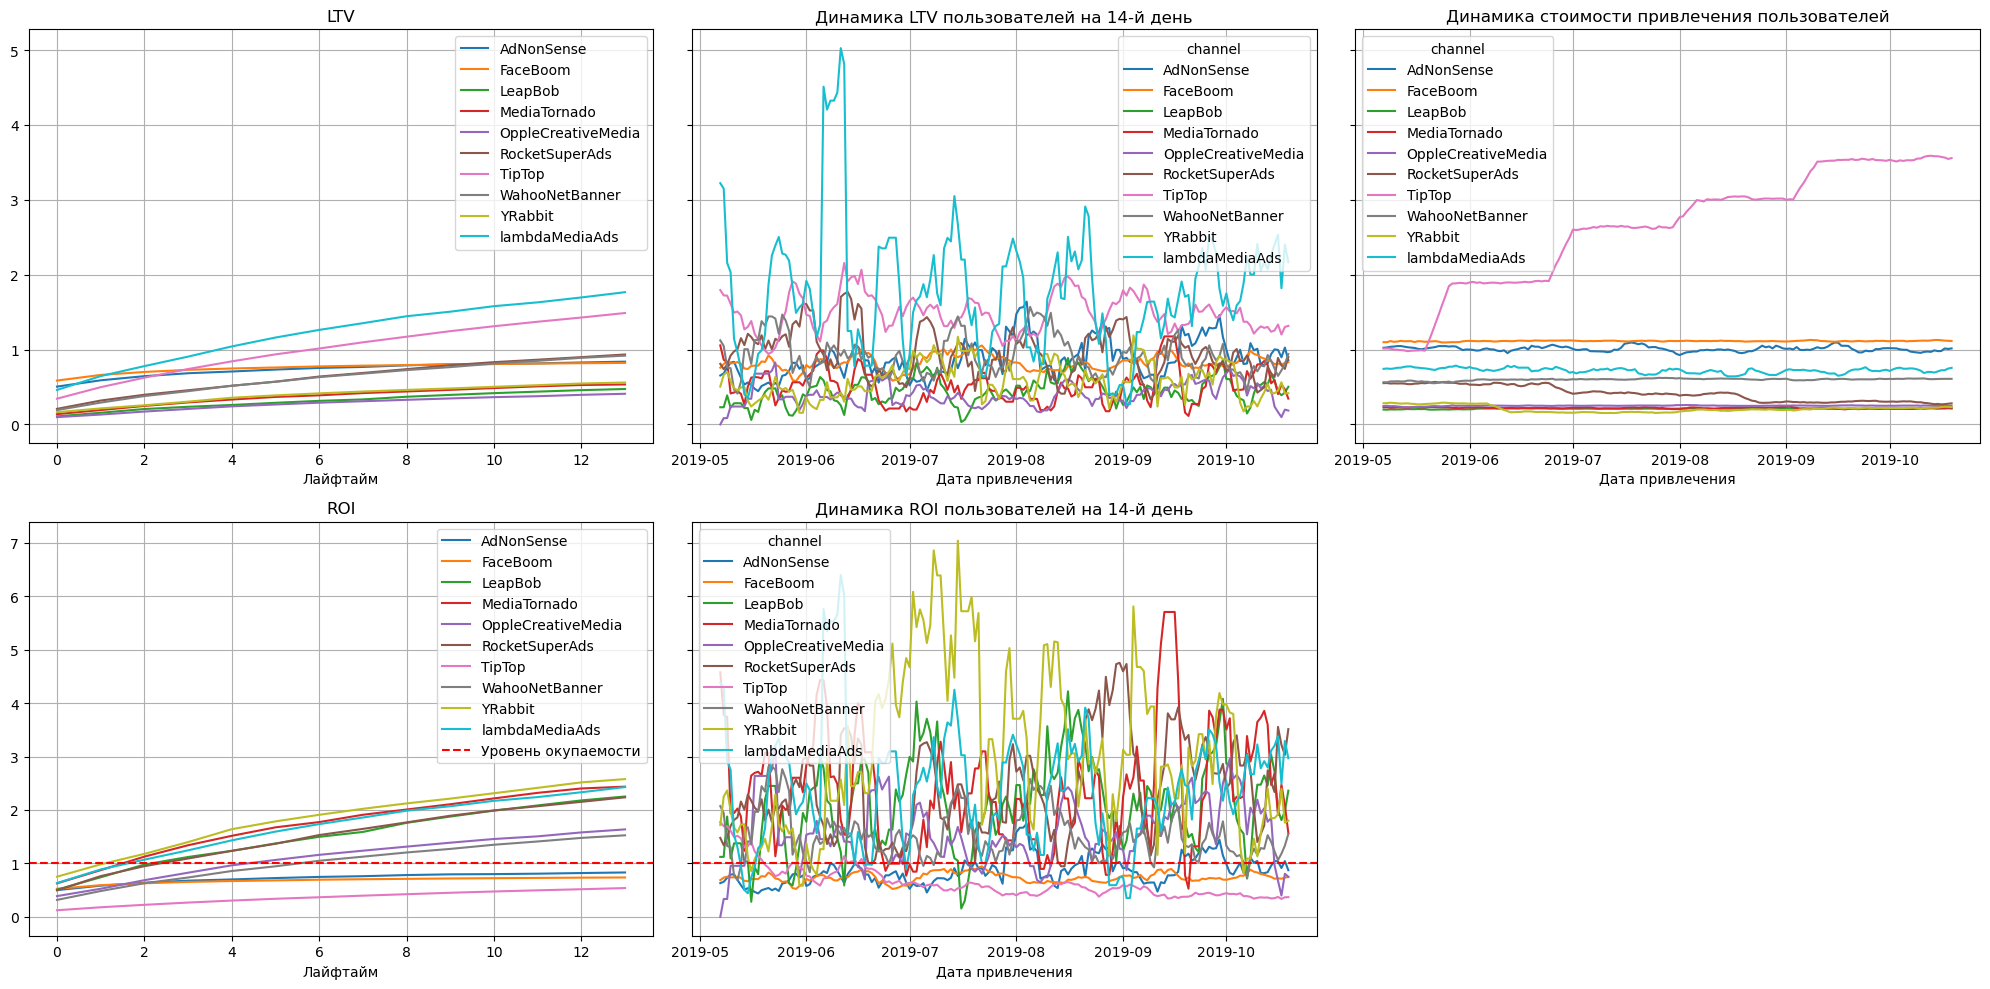

In [37]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

- Стоимость рекламы в TipTop сильно выделяется среди остальных и постоянно растет, но стабильно не окупаеться.

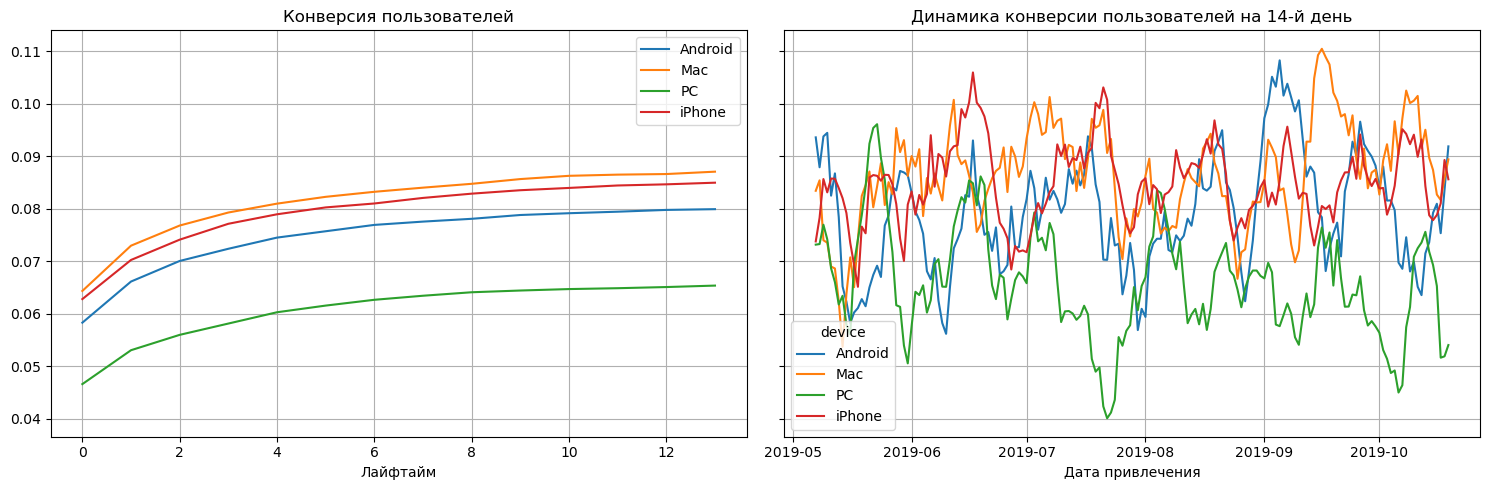

In [38]:
result_raw, result_grouped, result_in_time  = get_conversion(
    users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

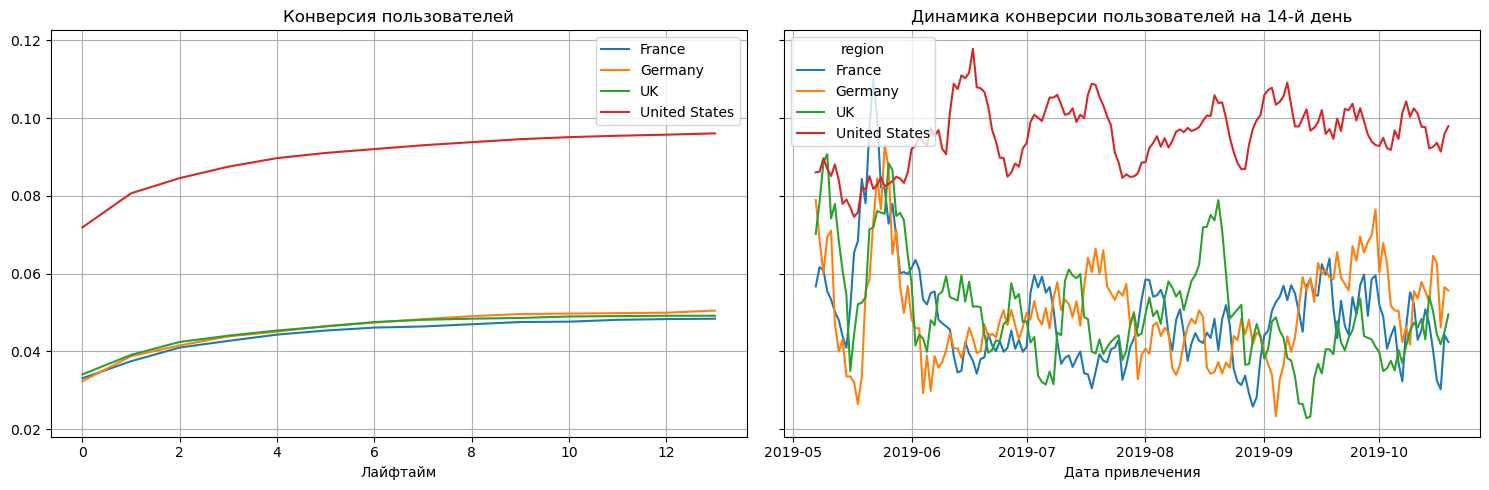

In [39]:
result_raw, result_grouped, result_in_time  = get_conversion(
    users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

- Конвертируются пользователи из США гораздо лучше остальных.

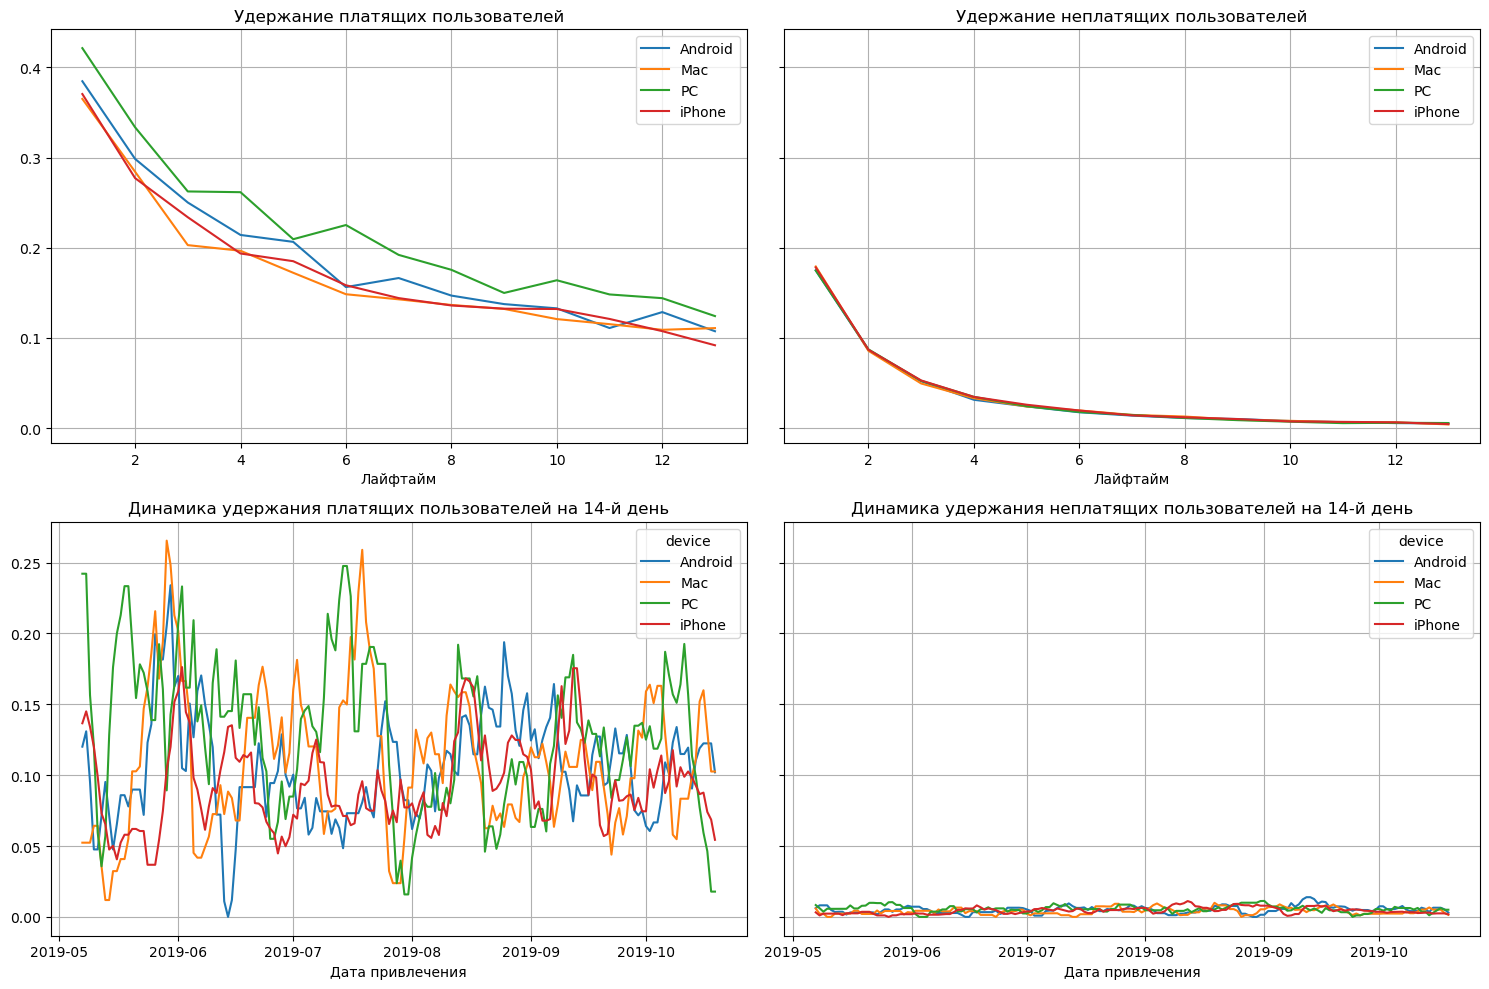

In [40]:
result_raw, result_grouped, result_in_time = get_retention(
    users,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device']
)

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

- Здесь все стабильно

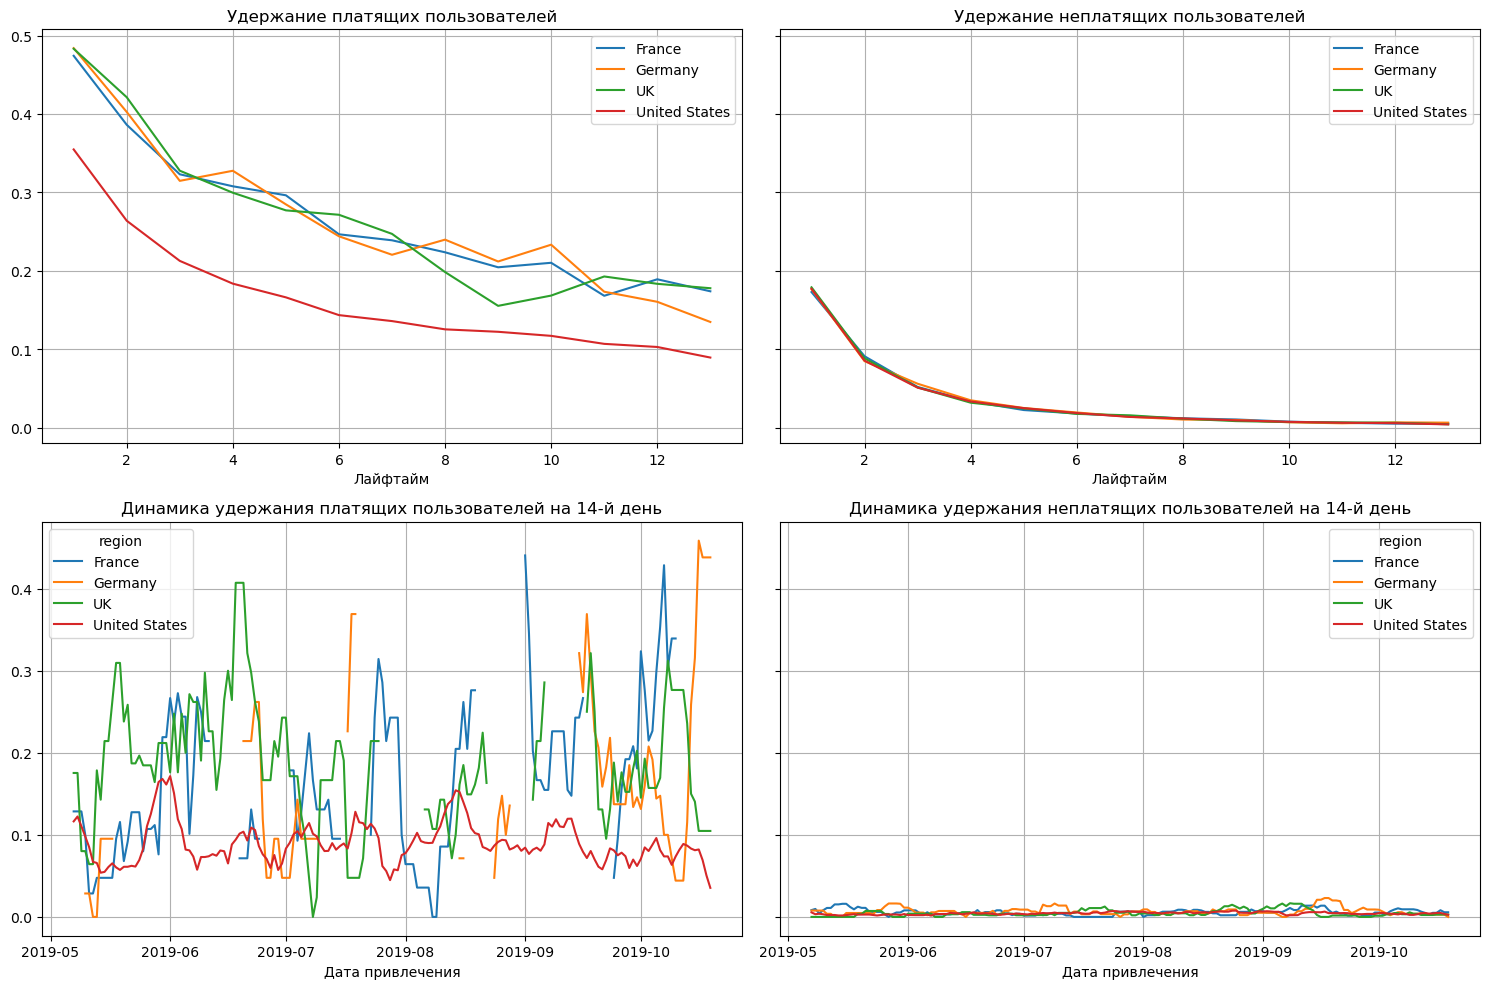

In [41]:
result_raw, result_grouped, result_in_time = get_retention(
    users,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region']
)

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

- Удержание платящих пользователей в США ниже всего

In [42]:
# Кол-во рекламных каналов в США.
test = users.query('region == "United States"')
test.groupby(['region','channel']).agg({'channel':'count'})

channel
region        channel                
United States FaceBoom          29144
              MediaTornado       4364
              RocketSuperAds     4448
              TipTop            19561
              YRabbit            4312

In [43]:
# Общее кол-во рекламы в TipTop.
t = users.query('channel == "TipTop"')
t['channel'].count()

19561

In [44]:
# Кол-во клиентов США в разбивке по девайсам.
usa = users.query('region == "United States"').groupby(
    ['region','device']).agg(count=('device','count'))

usa['dolya'] = usa.div(usa['count'].sum(),axis=1)

usa

count     dolya
region        device                  
United States Android  12436  0.201135
              Mac      15424  0.249462
              PC        6421  0.103851
              iPhone   27548  0.445551

## Вывод:
### Было проведено иследование с целью разобраться почему несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

##### Мы посмотрели динамику изменения расходов во времени по неделям и месяцам и выяснили что выделяются 2 самых дорогих канала привлечения:
- TipTop
- FaceBoom
##### Мы посмотрели на общую окупаемость и выяснили что:
- Реклама не окупается. ROI на  конец второй недели — чуть выше 80%.
- САС увелитивается. Возможно дело в увеличении рекламного бюджета.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
##### Проверим конверсию пользователей и динамику её изменения.
- Конверсия подвержена сезонности,но достаточно стабильна.
#####  Проверили удержание пользователей и динамику его изменения
- Как и ожидалось удержание у платящих выше чем у неплатящих.
- На динамике удержания видно, что у платящих есть сезонность, а у неплатящих все стабильно.
#####  Проанализируем окупаемость рекламы с разбивкой по устройствам
- LTV всё так же подвержен сезонности, но стабилен.
- Стоимость привлечения для Iphone и Mac самая высокая
- Но это все еще не то что мы ищем.
#####  Проанализируем окупаемость рекламы с разбивкой по странам.
- Стоимость привлечения пользователе в США сильно превышает остальные, но сильно отстает по окупаемости от остальных.
#####  Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
- Стоимость рекламы в TipTop и FaceBoom сильно выделяется среди остальных и постоянно растет, но стабильно не окупаеться.
##### Нашли явные проблемы в TipTop и Faceboom которые являются крупнейшими каналами USA. 

### Рекомендации для отдела маркетинга
1. Снизить,возможно даже отказаться от неэфективной рекламы в TipTop и FaceBoom.
2. Подумать как можно увеличить окупаемость в USA. 
3. Чаще обращать внимания на показатели маркетинга.